In [1]:
import pandas as pd
import numpy as np
import os

from sklearn.manifold import MDS

In [2]:
import matplotlib.pyplot as plt

In [3]:
storage = os.environ['MICOM_EXP'] + 'setA_mono_simTime144h/' # on Peregrine
print(storage)

run_status_file = storage + "run_status.tsv"
run_status = pd.read_csv(run_status_file, sep="\t")

rep_simID_dict = run_status.loc[run_status['program_log_doneSim']==1, ['rep_name', 'simID']].groupby('rep_name')['simID'].apply(list).to_dict()

/data/s4278836/First_project/experiments/setA_mono_simTime144h/


In [4]:
rep_simID_check_dict = {x: {rep_simID_dict[x][i]: 1 for i in range(len(rep_simID_dict[x]))} for x in rep_simID_dict.keys()}
rep_simID_df = pd.DataFrame.from_dict(rep_simID_check_dict)
rep_simID_df.sum() 

rep1    36
rep2    36
rep3    36
dtype: int64

For each replicate, if sum returns 36 means all 36 cases (18 species in plastic or non-plastic mode), it means all simulations have sucessfully completed.

Here, all replicates have sum of 36 => All 36 cases were sucessfully replicated 3 times

In [5]:
rep_name_list = rep_simID_df.columns.values
print(rep_name_list)

speciesID_set = set([x.rsplit('_', 1)[0] for x in rep_simID_df.index.values])
print(speciesID_set)

culture_type_list = ['batch', 'continuous']

media = ['EU_avg', 'DACH', 'diabetes2', 
         'gluten_free', 'high_fat', 'high_fiber', 
         'high_protein', 'mediterranean', 'unhealthy', 
         'vegan', 'vegetarian']

['rep1' 'rep2' 'rep3']
{'setA_11', 'setA_9', 'setA_24', 'setA_4', 'setA_22', 'setA_8', 'setA_19', 'setA_20', 'setA_21', 'setA_13', 'setA_18', 'setA_26', 'setA_15', 'setA_3', 'setA_16', 'setA_6', 'setA_17', 'setA_14'}


In [6]:
speciesID = 'setA_6'
replicate = 'rep1'

culture_type = 'batch'
media = 'EU_avg'

normalize = True

In [7]:
simID = speciesID + '_plastic'

data_dir = storage + replicate + '/v2.10.0_sim_' + simID + '/experiments/' + culture_type + '_mono-culture/'  + media + '/'
data_file = data_dir + 'species_avg_fluxes.tsv'


df = pd.read_csv(data_file, sep="\t", index_col='time').drop(['species_name', 'real_avg_bm'], axis=1)
# remove duplicated data due to saving data when doppriStepper is called
df = df.drop_duplicates()
# remove data when average biomass <= 0.0
df = df.loc[df['avg_bm']>0.0, :]

df.head()

avg_bm      vr_1      vr_2  vr_3  vr_4  vr_5  vr_6  vr_7  vr_8  \
time                                                                         
0.000000  12.31770  0.001267  0.000055     0     0     0     0     0     0   
0.820371  12.28680  0.001264  0.000055     0     0     0     0     0     0   
0.844658   6.80455  0.000700  0.000030     0     0     0     0     0     0   
0.868837   2.24833  0.000231  0.000010     0     0     0     0     0     0   
0.893057   1.40249  0.000144  0.000006     0     0     0     0     0     0   

          vr_9  ...  vr_251    vr_252  vr_253  vr_254  vr_255  vr_256  vr_257  \
time            ...                                                             
0.000000     0  ...       0  0.000242       0       0       0       0       0   
0.820371     0  ...       0  0.000241       0       0       0       0       0   
0.844658     0  ...       0  0.000134       0       0       0       0       0   
0.868837     0  ...       0  0.000044       0       0       0       0       0   
0.893057     0  ...       0  0.000028       0       0       0       0       0   

          vr_258    vr_259  vr_260  
time                                
0.000000       0  0.000242       0  
0.820371       0  0.000241       0  
0.844658       0  0.000134       0  
0.868837       0  0.000044       0  
0.893057       0  0.000028       0  

[5 rows x 261 columns]

In [8]:
if normalize:
    normalized = df.iloc[:,1:].div(df.avg_bm, axis=0)
    X = np.array(normalized, dtype='float')
else:
    X = np.array(df.iloc[:, 1:], dtype='float')

embedding = MDS(n_components=2, metric=True, dissimilarity='euclidean')
X_transformed = embedding.fit_transform(X)

In [9]:
mds_fluxes = pd.DataFrame(X_transformed, index=df.index, columns=['Dimension 1', 'Dimension 2'])
mds_fluxes.head()

Dimension 1  Dimension 2
time                              
0.000000    -0.001662    -0.001733
0.820371    -0.001064    -0.001624
0.844658    -0.000479    -0.001594
0.868837    -0.000803    -0.000039
0.893057     0.000013     0.000496

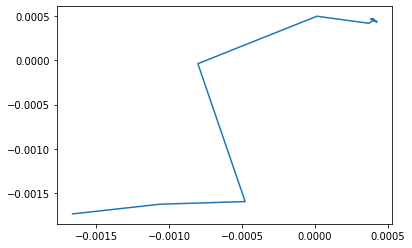

In [10]:
plt.plot(mds_fluxes['Dimension 1'], mds_fluxes['Dimension 2'])